In [1]:
from pyspark.sql import SparkSession, Row
import pyspark.sql.functions as F
import pandas as pd

In [2]:
spark = (
    SparkSession
    .builder
    .master("local[*]")
    .getOrCreate()
)

21/08/12 20:10:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
df = (
    spark
    .read
    .option("header", True)
    .option("inferSchema", True)
    .csv("weather.csv")
).cache()

In [4]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- temperature_max_f: integer (nullable = true)
 |-- temperature_mean_f: integer (nullable = true)
 |-- temperature_min_f: integer (nullable = true)
 |-- dew_point_max_f: integer (nullable = true)
 |-- dew_point_mean_f: integer (nullable = true)
 |-- dew_point_min_f: integer (nullable = true)
 |-- humidity_max: integer (nullable = true)
 |-- humidity_mean: integer (nullable = true)
 |-- humidity_min: integer (nullable = true)
 |-- sea_level_pressure_max_in: double (nullable = true)
 |-- sea_level_pressure_mean_in: double (nullable = true)
 |-- sea_level_pressure_min_in: double (nullable = true)
 |-- visibility_max_miles: integer (nullable = true)
 |-- visibility_mean_miles: integer (nullable = true)
 |-- visibility_min_miles: integer (nullable = true)
 |-- wind_speed_max_mph: integer (nullable = true)
 |-- wind_speed_mean_mph: integer (nullable = true)
 |-- gust_speed_max_mph: integer (nullable = true)
 |-- precipitation_in: string (nullable =

In [5]:
df = df.withColumn(
    "date",
    F.to_date(F.col("date"), "M/d/yyyy")
)

In [6]:
pd.set_option("display.max_columns", None)
df.limit(10).toPandas()

,date,temperature_max_f,temperature_mean_f,temperature_min_f,dew_point_max_f,dew_point_mean_f,dew_point_min_f,humidity_max,humidity_mean,humidity_min,sea_level_pressure_max_in,sea_level_pressure_mean_in,sea_level_pressure_min_in,visibility_max_miles,visibility_mean_miles,visibility_min_miles,wind_speed_max_mph,wind_speed_mean_mph,gust_speed_max_mph,precipitation_in,cloud_cover,events,wind_degrees
0,2014-01-01,34,29,24,18,13,5,60,49,38,30.43,30.36,30.27,10,10,10,18,9,23,0,5,None,297
1,2014-01-02,33,26,19,25,21,15,91,71,51,30.24,29.94,29.67,10,7,0,29,18,36,0.13,8,Snow,32
2,2014-01-03,19,14,9,13,4,-7,88,65,42,30.48,30.05,29.62,10,5,0,33,20,44,0.22,3,Fog-Snow,335
3,2014-01-04,31,17,3,18,5,-5,67,52,36,30.55,30.45,30.33,10,10,10,17,7,21,0,3,None,250
4,2014-01-05,49,36,23,48,31,17,93,81,68,30.34,30.18,29.79,10,5,0,23,7,31,0.1,7,Fog-Rain,88
5,2014-01-06,53,37,20,52,38,3,100,72,43,29.75,29.57,29.44,10,5,0,38,21,45,0.41,7,Fog-Rain-Snow,227
6,2014-01-07,20,13,6,-5,-12,-17,46,39,32,30.41,30.17,29.80,10,10,10,38,23,46,0,1,None,277
7,2014-01-08,24,17,10,2,-3,-7,52,44,36,30.58,30.51,30.43,10,10,10,22,13,28,0,3,None,273
8,2014-01-09,34,28,22,15,8,2,63,48,32,30.67,30.61,30.52,10,10,10,15,7,20,0,4,None,312
9,2014-01-10,38,31,24,36,29,16,92,78,63,30.59,30.43,30.23,10,4,0,7,4,8,0.19,8,Rain-Snow,21


In [7]:
df_snow = (
    df
    .where("lower(events) like '%snow%'")
)

<AxesSubplot:xlabel='date'>

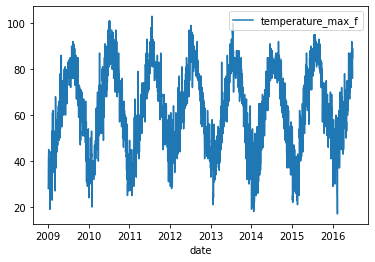

In [8]:
(
    df
    .select("date", "temperature_max_f")
    .toPandas()
    .plot(x="date", y="temperature_max_f")
)